This notebook uses [activeloop hub](https://github.com/AlgoveraAI/activeloop-hub)
and matplotlib, so you will need to install both.

The data is from [this Kaggle dataset](https://www.kaggle.com/datasets/sainikhileshreddy/food-recognition-2022/data) by Sai Nikhilesh Reddy.  

If this works for us we could consider using:
2.1 version of dataset [here](https://www.aicrowd.com/challenges/food-recognition-benchmark-2022)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import hub


In [27]:
dataPath='/Users/reena/Downloads/archive'

trainingData=dataPath+'/hub/train'



In [28]:
ds_train = hub.load(dataPath + '/hub/train')
ds_val = hub.load(dataPath +'/hub/val')
ds_test = hub.load(dataPath +'/hub/test')

/Users/reena/Downloads/archive/hub/train loaded successfully.

/Users/reena/Downloads/archive/hub/val loaded successfully.

/Users/reena/Downloads/archive/hub/test loaded successfully.



In [29]:
categories = ds_train.categories.info.class_names
super_categories = ds_train.super_categories.info.class_names


ds_train.tensors

{'images': Tensor(key='images'),
 'images_meta': Tensor(key='images_meta'),
 'masks': Tensor(key='masks'),
 'boxes': Tensor(key='boxes'),
 'categories': Tensor(key='categories'),
 'super_categories': Tensor(key='super_categories'),
 'areas': Tensor(key='areas'),
 'iscrowds': Tensor(key='iscrowds')}

The loop below goes through the index and grabs the index of each picture of a given category name.

In [30]:
myDict={};
for index in range(39000):
    myCat=categories[ds_train['categories'][index].numpy()[0]]
    if myCat in myDict.keys():
        myDict[myCat].append(index)
    else:
        myDict[myCat]=[index]

c:\Users\reena\AppData\Local\Programs\Python\Python312\Lib\site-packages\deeplake\core\tensor.py:719: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


In [31]:
myCategories=list(myDict.keys()) #list of the names of the category
print(myCategories)

['cake-chocolate', 'sugar-melon', 'mixed-salad-chopped-without-sauce', 'chips-french-fries', 'pie-plum-baked-with-cake-dough', 'pear', 'salad-lambs-ear', 'salmon', 'avocado', 'apple', 'chicken-wing', 'banana', 'coffee-with-caffeine', 'witloof-chicory', 'salad-leaf-salad-green', 'cenovis-yeast-spread', 'butter', 'milk', 'thickened-cream-35', 'pizza-margherita-baked', 'biscuits', 'cheese', 'mushrooms', 'white-coffee-with-caffeine', 'muesli', 'fruit-tart', 'chinese-cabbage', 'panna-cotta', 'rice', 'chives', 'mixed-vegetables', 'cauliflower', 'crackers', 'apple-pie', 'broccoli', 'crisps', 'french-beans', 'chorizo', 'focaccia', 'perch-fillets-lake', 'ristretto-with-caffeine', 'hamburger-bread-meat-ketchup', 'egg', 'yaourt-yahourt-yogourt-ou-yoghourt-natural', 'lentils', 'hard-cheese', 'bread-rye', 'fresh-cheese', 'bread-white', 'ham-cooked', 'romanesco', 'salami', 'curry-vegetarian', 'soup-pumpkin', 'potatoes-steamed', 'capers', 'sauce-roast', 'goat-average-raw', 'bread-wholemeal', 'orange'

In [32]:
myDict['veggie-burger'] 

[4507,
 4925,
 4926,
 6925,
 6968,
 7303,
 9777,
 9997,
 10247,
 10585,
 13544,
 14962,
 27825,
 27900,
 32241,
 33626,
 36204]

The code below pulls a picture with its given category.  Let's look at one of the veggie burgers

Category : veggie-burger
superCategory : food


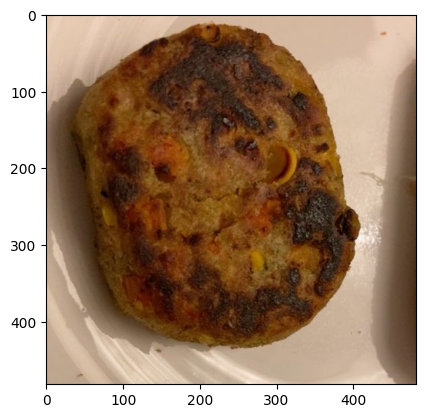

In [33]:
index = 32241
image = ds_train['images'][index].numpy()
category_index = ds_train['categories'][index].numpy()[0]
super_category_index = ds_train['super_categories'][index].numpy()[0]
print('Category : {0}'.format(categories[category_index]))
print('superCategory : {0}'.format(super_categories[super_category_index]))
plt.imshow(image)
plt.show()